


<h1 align=center><font size = 5>Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods</font></h1>





**Determining the Optimum Location for a Small to Medium Dog Kennel**

by Ian Fleury

I have been approached by a client who started a few years back to pursue her childhood dream of breeding American Cocker Spaniels. The city where she resides has bylaws that only allow for 3 dogs and one litter per household. Since she has outgrown the limitations of her area, it is time for her to move. She would like to transfer her kennel location to the U.S. and wants to look at data that will help her to make an informed decision where to move.

The client would like to know which states are considered the best for raising dogs and which ones should be avoided. She would also like to know which states have the most favorable laws in place for dog breeding. She is looking for states that will allow her to reach her upper limit of 20 dogs in residence, produce 3 litters a year, and make 15 puppy sales without having tough regulations, intrusive inspections, and high annual fees. Once she has selected which state to move to, she would like to have further data on the ten most populated cities. She wants to be close to the bigger cities for the convenience of vet care, entertainment, dining establishments, etc., but prefers not to reside within the city limits due to the denser living spaces and higher probability of noise complaints. 

The client would also like her new residence to be able to meet her recreational needs. She expressed a desire to be near a city that has some good walking parks, some art exhibits, theatrical events, museums, and possibly even an animal preserve or a zoo. When asked about dining, she said that she is not keen on fine dining, but prefers good pizza places, taco vendors, domestic beer establishments, specialty coffee places (fresh roasted), and the occasional espresso vendor. 

For breeding purposes, she would like to be reasonably close to a well-rated vet hospital a good boarding facility where she can have her dogs looked after when she needs to travel or rotate breeding pairs.

My goal is to retrieve the appropriate data, visualize it, analyze it, and present some results that the client can work with. I will begin the process by installing matplotlib, a popular package that is used for map visualizations. I will need this collection of tools throughout, and will require the basemap module later on for visualizing clusters in my predictive model. 

Note: Because Basemap is not supported in the newest updates, I will have to downgrade to version 3.1.

In [190]:
# install matplotlib version 3.1, which includes basemap package.
!pip install matplotlib==3.1
# Notice: to use downgraded version
# kernel may need to be restarted after installation.

In [191]:
# check version 
import matplotlib
print(matplotlib.__version__)

3.1.0


Now, I will import some other libraries that will be needed as well.

In [192]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

print('Libraries imported.')

Libraries imported.


...And a website scraping tool.

In [193]:
# install website scraping tool
!conda install -c anaconda beautifulsoup4 --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2020.12.5-py36h5~ --> anaconda::certifi-2020.6.20-py36_0
  openssl            conda-forge::openssl-1.1.1j-h7f98852_0 --> anaconda::openssl-1.1.1h-h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


The first website to be scraped will be the American Kennel Club, which has an article from their expert advice section that lists the top 10 best and worst states for pet's health.

In [194]:
from bs4 import BeautifulSoup  # import BeautifulSoup for web scraping

# webpage url
url1 = requests.get("https://www.akc.org/expert-advice/health/best-and-worst-states-for-pets-health")

# get content
soup1 = BeautifulSoup(url1.content, 'html.parser')

# retrieve list 1 & 2: 10 best states & 10 worst states
best = soup1.find_all('ol')[1].get_text()   
worst = soup1.find_all('ol')[2].get_text()  # retrieve list 2: 10 Worst States

I will start by making a DataFrame for the top ten best states and give them a 'Pet Health Score' of 1.

In [195]:
import io  # module that expects and produces str objects

# convert to StringIO object
data1 = io.StringIO(best)

# convert to dataframe
df_best = pd.read_csv(data1,sep="/n", names=['State'], engine='python')

# add "Pet Health Score" of +1
df_best.insert(1,"Pet Health Score",[1,1,1,1,1,1,1,1,1,1], True)

df_best

,State,Pet Health Score
0,Montana,1
1,Nebraska,1
2,Colorado,1
3,New Mexico,1
4,New Hampshire,1
5,Idaho,1
6,South Dakota,1
7,Wyoming,1
8,North Dakota,1
9,Kansas,1


Next, I will create a DataFrame for the top 10 worst states and give them a 'Pet Health Score' of -1.

In [196]:
# convert to StringIO object
data1b = io.StringIO(worst)

# convert to dataframe
df_worst = pd.read_csv(data1b,sep="/n", names=['State'], engine='python')

# add "Pet Health Score" of -1
df_worst.insert(1,"Pet Health Score",[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1], True)

df_worst

,State,Pet Health Score
0,Mississippi,-1
1,Alabama,-1
2,Louisiana,-1
3,South Carolina,-1
4,Arkansas,-1
5,Tennessee,-1
6,Texas,-1
7,Georgia,-1
8,Ohio,-1
9,North Carolina,-1


Now, I will join both DataFrames together so that they can easily be added as one category in a bigger DataFrame.

In [197]:
# combine best and worst lists together under same headings
df_bestworst = df_best.append(df_worst)

df_bestworst

,State,Pet Health Score
0,Montana,1
1,Nebraska,1
2,Colorado,1
3,New Mexico,1
4,New Hampshire,1
5,Idaho,1
6,South Dakota,1
7,Wyoming,1
8,North Dakota,1
9,Kansas,1


The next dataset to be retrieved is from the “Animal Legal & Historical Center” at Michigan State University, which gives an overview of commercial pet breeder laws per state. Instead of using BeautifulSoup, this time I will use lxml.

In [198]:
!conda install -c anaconda lxml --yes  # install lxml

Solving environment: done

# All requested packages already installed.



In [199]:
# webpage url                                                                                                               
url2 = 'https://www.animallaw.info/topic/table-state-commercial-pet-breeders-laws'

# extract tables
dfs2 = pd.read_html(url2)

# get first table                                                                                                           
df2 = dfs2[0]

# extract columns                                                                                                           
df2 = df2[['State','Number of Dogs that triggers law','Definition of commercial breeder and licensing requirements','Maximum number of dogs allowed','Inspection provisions']]

df2.head()

,State,Number of Dogs that triggers law,Definition of commercial breeder and licensing requirements,Maximum number of dogs allowed,Inspection provisions
0,Alabama,NaN,NaN,NaN,NaN
1,Alaska,NaN,NaN,NaN,NaN
2,ArizonaA. R. S. § 11-1009,5 or more dogs,"""Kennel"" means an enclosed, controlled area, i...",Not listed,Fewer than 20 dogs: may be subject to an inspe...
3,Arkansas,NaN,NaN,NaN,NaN
4,CaliforniaWest's Ann. Cal. Health & Safety Cod...,3 or more litters or 20 or more dogs during th...,"As used in this article, ""dog breeder,"" or ""br...",Not listed,Not listed


In [200]:
# print number of rows & columns
df2.shape

(51, 5)

I will merge the previous DataFrame (df_bestworst) into this one to incorporate the Pet Health Score. Then I will clean up the data a bit. 

In [201]:
# merge the two dataframes
df_reqs = pd.merge(df2,df_bestworst, how='left', on='State')

# change NAs to blanks
df_reqs.fillna(" ", inplace=True)

# make blanks in Pet Health Score have a score of 0
df_reqs['Pet Health Score'].replace([" "],[0], regex=True, inplace=True)

df_reqs.head()

,State,Number of Dogs that triggers law,Definition of commercial breeder and licensing requirements,Maximum number of dogs allowed,Inspection provisions,Pet Health Score
0,Alabama,,,,,-1.0
1,Alaska,,,,,0.0
2,ArizonaA. R. S. § 11-1009,5 or more dogs,"""Kennel"" means an enclosed, controlled area, i...",Not listed,Fewer than 20 dogs: may be subject to an inspe...,0.0
3,Arkansas,,,,,-1.0
4,CaliforniaWest's Ann. Cal. Health & Safety Cod...,3 or more litters or 20 or more dogs during th...,"As used in this article, ""dog breeder,"" or ""br...",Not listed,Not listed,0.0


Remove unnecessary rows

In [202]:
# assign empty rows to a variable
blanks = df_reqs[df_reqs['Definition of commercial breeder and licensing requirements'].map(len) < 2]

# create list of empty rows to remove
remove_list = []
x = range(0,22)
for n in x: 
    remove_list.append(blanks.index[n])

# drop rows in remove list
df_reqs.drop(index=remove_list, inplace=True)

df_reqs.head()

,State,Number of Dogs that triggers law,Definition of commercial breeder and licensing requirements,Maximum number of dogs allowed,Inspection provisions,Pet Health Score
2,ArizonaA. R. S. § 11-1009,5 or more dogs,"""Kennel"" means an enclosed, controlled area, i...",Not listed,Fewer than 20 dogs: may be subject to an inspe...,0.0
4,CaliforniaWest's Ann. Cal. Health & Safety Cod...,3 or more litters or 20 or more dogs during th...,"As used in this article, ""dog breeder,"" or ""br...",Not listed,Not listed,0.0
5,Colorado,C. R. S. A. § 35-80-101 - 117Pet Animal Care a...,"“Dog breeder” means any firm, person, or corpo...",Not listed,"Per law, the commissioner, upon his or her own...",1.0
6,Connecticut,"C.G.S.A. § 22-342, 344CT ADC § 22-344-1 - 15",Any owner or keeper of a kennel who breeds mor...,Not listed,"The commissioner, the Chief Animal Control Off...",0.0
7,Delaware,16 Del.C. § 3042F 16 Del.C. § 3044F,"Kennel is more than 4 dogs are kept for show, ...",Not listed,Animal welfare officers are authorized to insp...,0.0


Remove unnecessary columns

In [203]:
# adjust 2 state names 
df_reqs.at[2,'State'] = 'Arizona'
df_reqs.at[4,'State'] = 'California'

# drop unnecessary columns
df_reqs.drop(['Number of Dogs that triggers law','Maximum number of dogs allowed', 'Inspection provisions'], axis=1, inplace=True)

# set 'State' as index
df_reqs.set_index('State', inplace=True)

# expand column width to see all of text
with pd.option_context('display.max_colwidth', None): display(df_reqs.head(3))

,Definition of commercial breeder and licensing requirements,Pet Health Score
State,,
Arizona,"""Kennel"" means an enclosed, controlled area, inaccessible to other animals, in which a person keeps, harbors or maintains five or more dogs under controlled conditions.A. R. S. § 11-1001A person operating a kennel shall obtain a permit issued by the board of supervisors of the county where the kennel is located except if each individual dog is licensed.Cost is $75 A. R. S. § 11-1009",0.0
California,"As used in this article, ""dog breeder,"" or ""breeder"" means a person, firm, partnership, corporation, or other association that has sold, transferred, or given away all or part of 3 or more litters or 20 or more dogs during the preceding 12 months that were bred and reared on the premises of the person, firm, partnership, corporation, or other association.",0.0
Colorado,"“Dog breeder” means any firm, person, or corporation which is engaged in the operation of breeding and raising dogs for the purpose of selling, trading, bartering, giving away, or otherwise transferring same, excluding racing greyhounds that are not intended to be companion pets.""Pet animal facility” means any place or premise used in whole or in part, which part is used for the keeping of pet animals for the purpose of adoption, breeding, boarding, grooming, handling, selling, sheltering, trading, or otherwise transferring such animals. “Pet animal facility” also includes any individual animals kept by such a facility as breeding stock, such licensing of individual breeding stock to be inclusive in the pet animal facility license.",1.0


I have extracted the numeric data contained in the 'Definition of commercial breeder and licensing requirements' column and converted it to three lists of integers corresponding to three categories: 'Maximum number of dogs', 'Maximum puppy sales per year', and 'Maximum litters per year'.

In [204]:
# assign numbers contained in 'Definition of commercial breeder and licensing requirements' to variables
max_dogs =  (5,0,0,0,5,6,21,4,30,5,5,25,4,16,10,4,4,0,50,11,10,0,20,11,2,30,10,11,0)
max_sales = (0,20,0,0,0,0,0,0,30,0,17,0,0,0,0,0,31,0,60,0,0,61,0,20,2,0,0,0,25)
max_lits =  (0,3,0,3,0,0,0,0,6,0,2,0,0,0,6,0,4,0,9,0,4,0,0,0,2,0,0,0,4)

# add 3 columns to contain these variables
df_reqs.insert(0,'Maximum number of dogs', max_dogs)
df_reqs.insert(1,'Maximum puppy sales per year', max_sales)
df_reqs.insert(2,'Maximum litters per year', max_lits)

df_reqs.head(3)

,Maximum number of dogs,Maximum puppy sales per year,Maximum litters per year,Definition of commercial breeder and licensing requirements,Pet Health Score
State,,,,,
Arizona,5,0,0,"""Kennel"" means an enclosed, controlled area, i...",0.0
California,0,20,3,"As used in this article, ""dog breeder,"" or ""br...",0.0
Colorado,0,0,0,"“Dog breeder” means any firm, person, or corpo...",1.0


In [205]:
# makes sure that all numbers are integers and not strings
df_reqs['Pet Health Score'] = df_reqs['Pet Health Score'].astype(int)

df_reqs.dtypes

Maximum number of dogs                                          int64
Maximum puppy sales per year                                    int64
Maximum litters per year                                        int64
Definition of commercial breeder and licensing requirements    object
Pet Health Score                                                int64
dtype: object

To fill in some of the missing information, some inferences need to be made. Since the average cocker spaniel litter is 5 puppies, a “Maximum litters per year” value of 3 litters implies that there would also be a  “Maximum puppy sales per year” of at least 15 puppy sales (3 litters x 5 puppies) and vice versa. If there is no entry for “Maximum number of dogs”, but a certain amount of litters are allowed, then I would put a value of 2 for max dogs (the minimum amount it takes to produce litters.) If a number of litters is not mentioned, then I would leave a value of 0 for max dogs. 

In [206]:
# adjust the 'Maximum puppy sales per year'
for i in range(0,29):
    if df_reqs.iat[i,1] == 0:
        df_reqs.iat[i,1] = df_reqs.iat[i,2]*5

# adjust the 'Maximum litters per year'
for i in range(0,29):
    if df_reqs.iat[i,2] == 0:
        df_reqs.iat[i,2] = df_reqs.iat[i,1]//5
        
# adjust the 'Maximum number of dogs'     
for i in range(0,29):
    if df_reqs.iat[i,0] == 0 and df_reqs.iat[i,2] != 0:
        df_reqs.iat[i,0] = 2

df_reqs

,Maximum number of dogs,Maximum puppy sales per year,Maximum litters per year,Definition of commercial breeder and licensing requirements,Pet Health Score
State,,,,,
Arizona,5,0,0,"""Kennel"" means an enclosed, controlled area, i...",0
California,2,20,3,"As used in this article, ""dog breeder,"" or ""br...",0
Colorado,0,0,0,"“Dog breeder” means any firm, person, or corpo...",1
Connecticut,2,15,3,Any owner or keeper of a kennel who breeds mor...,0
Delaware,5,0,0,"Kennel is more than 4 dogs are kept for show, ...",0
Illinois,6,0,0,"“Kennel operator” means any person who sells, ...",0
Indiana,21,0,0,“Commercial dog breeder” means a person who ma...,0
Iowa,4,0,0,"“Commercial breeder” means a person, engaged i...",0
Kansas,30,30,6,“Animal breeder” means any person who operates...,1


The client’s desired goal is 20 dogs in residency, 3 litters per year, and 15 puppy sales per year. Comparisons should be run to see which states meet, do not meet, or exceed the client’s stated expectations. A score of 1 will be given for each feature that meets or exceeds the client’s expectations, and 0 for each feature that does not meet them.

In [207]:
# measure and score 'Maximum number of dogs'
for i in range(0,29):
    if df_reqs.iat[i,0] > 20:
        df_reqs.iat[i,0] = 1
    else:
        df_reqs.iat[i,0] = 0

# measure and score 'Maximum puppy sales per year'
for i in range(0,29):
    if df_reqs.iat[i,1] > 15:
        df_reqs.iat[i,1] = 1
    else:
        df_reqs.iat[i,1] = 0

# measure and score 'Maximum litters per year'
for i in range(0,29):
    if df_reqs.iat[i,2] > 3:
        df_reqs.iat[i,2] = 1
    else:
        df_reqs.iat[i,2] = 0

df_reqs.head()

,Maximum number of dogs,Maximum puppy sales per year,Maximum litters per year,Definition of commercial breeder and licensing requirements,Pet Health Score
State,,,,,
Arizona,0,0,0,"""Kennel"" means an enclosed, controlled area, i...",0
California,0,1,0,"As used in this article, ""dog breeder,"" or ""br...",0
Colorado,0,0,0,"“Dog breeder” means any firm, person, or corpo...",1
Connecticut,0,0,0,Any owner or keeper of a kennel who breeds mor...,0
Delaware,0,0,0,"Kennel is more than 4 dogs are kept for show, ...",0


I will add a 'Total Score' column to sum all of the scores per each row and then plot the result using matplotlib to display the winner.

In [208]:
# add column to sum all scores
df_reqs['Total Score'] = df_reqs.sum(axis=1)

df_reqs.head()

,Maximum number of dogs,Maximum puppy sales per year,Maximum litters per year,Definition of commercial breeder and licensing requirements,Pet Health Score,Total Score
State,,,,,,
Arizona,0,0,0,"""Kennel"" means an enclosed, controlled area, i...",0,0
California,0,1,0,"As used in this article, ""dog breeder,"" or ""br...",0,1
Colorado,0,0,0,"“Dog breeder” means any firm, person, or corpo...",1,1
Connecticut,0,0,0,Any owner or keeper of a kennel who breeds mor...,0,0
Delaware,0,0,0,"Kennel is more than 4 dogs are kept for show, ...",0,0


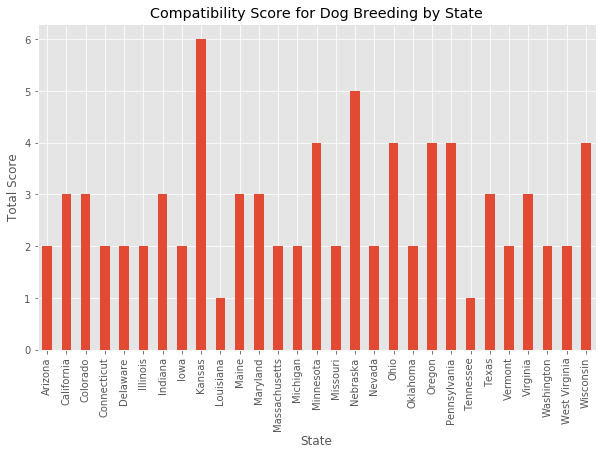

['Kansas'] is the clear winner with a score of 6


In [209]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

#add 2 to each score to eliminate negative and zero values. This will make for a cleaner looking bar chart without affecting the accuracy of the distribution. 
df_state = df_reqs['Total Score'] +2 

# plot data
df_state.plot(kind='bar', figsize=(10, 6))

plt.xlabel('State') # add x-label to the plot
plt.ylabel('Total Score') # add y-label to the plot
plt.title('Compatibility Score for Dog Breeding by State') # add title to the plot

plt.show()

print(df_state[df_state == max(df_state)].index.values, "is the clear winner with a score of", max(df_state))

Since Kansas is the number one choice, the next step would be to find a city that best meets the client's recreational needs. This will be done by using the Foursquare API to explore the attractions in the top 10 Kansas cities by population. The 10 cities used are: Wichita, Overland Park, Kansas City, Olathe, Topeka, Lawrence, Shawnee, Manhattan, Lenexa, and Salina. The query results should match the client's goal to be near a city that has some good walking parks, some art exhibits, theatrical events, museums, and possibly even an animal preserve or a zoo. For dining, she prefers on-the-go establishments like pizza places, and taco vendors, with occasional stops for domestic beer, specialty coffee places (fresh roasted), and espresso vendors.

In [210]:
CLIENT_ID = 'private' # my Foursquare ID
CLIENT_SECRET = 'private' # my Foursquare Secret
ACCESS_TOKEN = 'private' # my FourSquare Access Token
VERSION = '20180604' # version number
LIMIT = 50   # search limit

In [211]:
# create index
col_fill = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50)

# establish search radius of 40000 meters (40km)
radius = 40000

# create new DataFrame
df2b = pd.DataFrame(col_fill)

# add variable for ten cities to searched
ten_cities = ['Wichita, KS','Overland Park, KS','Kansas City, KS','Olathe, KS','Topeka, KS','Lawrence, KS','Shawnee, KS','Manhattan, KS','Lenexa, KS','Salina, KS']

# get Foursquare results from all ten cities and add to DataFrame
for city in ten_cities:
    url2b = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&near={}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, city, ACCESS_TOKEN, VERSION, radius, LIMIT)
    results2b = requests.get(url2b).json()
    venues2b = results2b['response']['groups']
    df_add = pd.json_normalize(venues2b[0]['items'])
    df2b[city] = pd.DataFrame(df_add.loc[:, 'venue.name'])

df2b.head(3)

,0,"Wichita, KS","Overland Park, KS","Kansas City, KS","Olathe, KS","Topeka, KS","Lawrence, KS","Shawnee, KS","Manhattan, KS","Lenexa, KS","Salina, KS"
0,0,Nifty Nut House,The Peanut,Bonito Michoacan,Mi Ranchito Cocina & Cantina Mexicana,Hanover Pancake House,The Burger Stand at The Casbah,Oriental Express,The Chef Cafe,Black Dog Coffeehouse,Cozy Inn
1,1,Public,J. Gilbert's Wood-Fired Steaks & Seafood,Slap's BBQ,Centerfire Shooting Sports,Hazel Hill Chocolate,Liberty Hall,Gage Park,"Steve's Floral, Inc.",Gomer's Liquor Store,Stiefel Theatre
2,2,Downtown YMCA,Clock Tower Bakery,Weird Stuff Antiques,Sylas and Maddy's,NOTO Arts District,Free State Brewing Company,Qdoba Mexican Grill,Radina's Coffeehouse & Roastery,Ulta Beauty – Curbside Pickup Only,Hickory Hut Barbecue


Now that I have entries that represent the popular venues for each of the 10 cities, I will search the results using keywords that fit the client's desired establishments. 

In [212]:
import re # import re for regular expression operations

# add queries to variable. The .+ symbol is used in place of * symbol
wds_to_search = ['.+ Zoo','Zoo .+','.+ Taco','Taco .+','.+ Art','Art .+','.+ Museum','Museum .+','.+ Theater','Theater .+','.+ Pizza','Pizza .+','.+ Coffee Roast','Coffee Roast .+','.+ Espresso','Espresso .+','.+ Brew','Brew .+','.+ Park','Park .+']

# create a function that will take city as input, search that column for queries (substrings), and add whole string to list 
def city_search(city):
    city_lst = []
    for word in df2b[city]:
        df2b[city] = df2b[city].astype(str)
        for w in wds_to_search:
            if re.search(w, word):
                city_lst.append(word)
    return city_lst

# create big list to which small lists will be appended
city_full_lst = []

# run city_search() function on all cities and append results to city_full_lst
city_full_lst.append(city_search("Wichita, KS"))
city_full_lst.append(city_search("Overland Park, KS"))
city_full_lst.append(city_search("Kansas City, KS"))
city_full_lst.append(city_search("Olathe, KS"))
city_full_lst.append(city_search("Topeka, KS"))
city_full_lst.append(city_search("Lawrence, KS"))
city_full_lst.append(city_search("Shawnee, KS"))
city_full_lst.append(city_search("Manhattan, KS"))
city_full_lst.append(city_search("Lenexa, KS"))
city_full_lst.append(city_search("Salina, KS"))

# convert city_full_lst to DataFrame and transpose DataFrame so that results are grouped by columns not rows
df_attractions = pd.DataFrame(city_full_lst)
df_attractions = df_attractions.T

# assign cities names as column headers
df_attractions.columns = ten_cities

df_attractions.head()

,"Wichita, KS","Overland Park, KS","Kansas City, KS","Olathe, KS","Topeka, KS","Lawrence, KS","Shawnee, KS","Manhattan, KS","Lenexa, KS","Salina, KS"
0,Nortons Brewing Company,AMC Ward Parkway 14,Boulevard Brewing Tours & Recreation Center/Be...,SPIN! Neapolitan Pizza Olathe,NOTO Arts District,Free State Brewing Company,Gage Park,Taco Lucha,Shawnee Mission Park,Oakdale Park
1,Ziggy's Pizza,Old Shawnee Pizza & Italian Kitchen,Kauffman Center for the Performing Arts,SPIN! Neapolitan Pizza Olathe,Gage Park,Minsky's Pizza,Taco Villa,Beach Museum of Art,SPIN! Neapolitan Pizza Olathe,Taco Master
2,Central Standard Brewing,Old Shawnee Pizza & Italian Kitchen,Boulevard Brewing Company,Shawnee Mission Park,Norsemen Brewing Company,Lawrence Arts Center,NOTO Arts District,Beach Museum of Art,SPIN! Neapolitan Pizza Olathe,Blue Skye Brewery & Eats
3,Wichita Art Museum,Waldo Pizza,Cinder Block Brewery,Shawnee Mission Dog Park,Taco Villa,Limestone Pizza,Red Robin Gourmet Burgers and Brews,Beach Museum of Art,Original Pizza,None
4,Wichita Art Museum,Loose Park,City Market Coffee Roasters,Overland Park Arboretum,The Blind Tiger Brewery,Taco Zone,Glory Days Pizza,Little Apple Brewing Co.,Shawnee Mission Dog Park,None


I will remove the duplicate values

In [213]:
# remove duplicate results
for col in ten_cities:
     df_plus = pd.DataFrame(df_attractions[col])
     df_duplicates_removed = pd.DataFrame.drop_duplicates(df_plus)
     df_attractions[col] = df_duplicates_removed
     
df_attractions.head()

,"Wichita, KS","Overland Park, KS","Kansas City, KS","Olathe, KS","Topeka, KS","Lawrence, KS","Shawnee, KS","Manhattan, KS","Lenexa, KS","Salina, KS"
0,Nortons Brewing Company,AMC Ward Parkway 14,Boulevard Brewing Tours & Recreation Center/Be...,SPIN! Neapolitan Pizza Olathe,NOTO Arts District,Free State Brewing Company,Gage Park,Taco Lucha,Shawnee Mission Park,Oakdale Park
1,Ziggy's Pizza,Old Shawnee Pizza & Italian Kitchen,Kauffman Center for the Performing Arts,NaN,Gage Park,Minsky's Pizza,Taco Villa,Beach Museum of Art,SPIN! Neapolitan Pizza Olathe,Taco Master
2,Central Standard Brewing,NaN,Boulevard Brewing Company,Shawnee Mission Park,Norsemen Brewing Company,Lawrence Arts Center,NOTO Arts District,NaN,NaN,Blue Skye Brewery & Eats
3,Wichita Art Museum,Waldo Pizza,Cinder Block Brewery,Shawnee Mission Dog Park,Taco Villa,Limestone Pizza,Red Robin Gourmet Burgers and Brews,NaN,Original Pizza,None
4,NaN,Loose Park,City Market Coffee Roasters,Overland Park Arboretum,The Blind Tiger Brewery,Taco Zone,Glory Days Pizza,Little Apple Brewing Co.,Shawnee Mission Dog Park,NaN


And count the unique query matches per city

In [214]:
# display which city has the highest amount of matches
df_attractions.count().max

<bound method Series.max of Wichita, KS          10
Overland Park, KS     5
Kansas City, KS       7
Olathe, KS            5
Topeka, KS            7
Lawrence, KS          8
Shawnee, KS           6
Manhattan, KS         4
Lenexa, KS            6
Salina, KS            3
dtype: int64>

Since Wichita has the most matches that satisfy the client's stated objectives, I will use it as the central hub from which I can do all of my searches. I will use geopy to find the city's latitude\longitude coordinates and folium to view it on a map.

In [215]:
!conda install -c conda-forge geopy --yes  # install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2020.12.5-ha878542_0
  certifi                anaconda::certifi-2020.6.20-py36_0 --> conda-forge::certifi-2020.12.5-py36h5fab9bb_1
  openssl               anaconda::openssl-1.1.1h-h7b6447c_0 --> conda-forge::openssl-1.1.1j-h7f98852_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [216]:
# retrieve latitude/longitude coordinates for Wichita
geolocator = Nominatim(user_agent="agent")
lat_w = geolocator.geocode('Wichita, KS').latitude
lng_w = geolocator.geocode('Wichita, KS').longitude

print('The geograpical coordinates of Wichita are {}, {}.'.format(lat_w, lng_w))

The geograpical coordinates of Wichita are 37.6922361, -97.3375448.


In [217]:
!conda install -c conda-forge folium=0.5.0 --yes  # install folium
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [218]:
# create map of Wichita using latitude and longitude values
map_wichita = folium.Map(location=[lat_w, lng_w], zoom_start=11)

map_wichita

The client wants to be close to a populated city for the convenience of vet care, entertainment, dining establishments, etc., but prefers not to reside within the city limits due to the denser living spaces and higher probability of noise complaints. I will do a search for surrounding cities and towns within a 25 mile radius of Wichita's city center starting with a site called www.gomapper.com.

In [219]:
# webpage url                                                                                                               
url3 = 'http://www.gomapper.com/travel/list-of-cities-near/wichita.html'

# extract tables
dfs3 = pd.read_html(url3)

# get first table                                                                                                           
df3 = dfs3[7]

In [220]:
# drop unnecessary column and rename existing headers
df3.drop(2, axis=1, inplace=True)
df3.rename(columns={0:'city',1:'Wichita (mi)'}, inplace=True)

# drop unneccessary row
df3.drop(0, axis=0, inplace=True)

df3

,city,Wichita (mi)
1,MacDonald,4 km / 2.5 miles
2,Eastborough,6.5 km / 4 miles
3,Bel Aire,9.9 km / 6.2 miles
4,Park City,12.7 km / 7.9 miles
5,Kechi,13.1 km / 8.2 miles
6,Haysville,13.6 km / 8.4 miles
7,Maize,14.7 km / 9.1 miles
8,Valley Center,15.8 km / 9.8 miles
9,Derby,16.8 km / 10.4 miles
10,Andover,17.6 km / 11 miles


Since these results do not contain latitude/longitude coordinates, and I will need them for mapping later, I will use geopy to fill these values.

In [221]:
# create lists to hold latitude and longitude coordinates
get_lat = []
get_lng = []

# retreive latitude\longitude coordinates for each city and add to lists
for city in df3['city']:
    address = city + ', KS'
    location = geolocator.geocode(address)
    lats = location.latitude
    lngs = location.longitude
    get_lat.append(lats)
    get_lng.append(lngs)

In [222]:
# add columns for latitudes and longitudes
df3['lat'] = get_lat
df3['lng'] = get_lng

# clean up text
df3.replace('.+/',' ', regex=True, inplace=True)
df3.replace('miles', ' ', regex=True, inplace=True)

df3.head()

,city,Wichita (mi),lat,lng
1,MacDonald,2.5,37.280064,-94.852578
2,Eastborough,4,37.688070,-97.263655
3,Bel Aire,6.2,37.762512,-97.266988
4,Park City,7.9,37.800012,-97.318376
5,Kechi,8.2,37.800889,-97.280889


I would like more areas to work with, so I will do a second search for surrounding cities within 25 miles, but this time using a site named www.withinhours.com.

In [223]:
# webpage url
url4 = requests.get("https://withinhours.com/25-miles-of-wichita-ks")

# get content
soup4 = BeautifulSoup(url4.text, 'html.parser')

# retrieve specified html <script>
txt4 = str(soup4.find_all('script')[12])

Since the values are not in table form this time, I will use Python's string find method and a while loop to extract the relevant data and store it in a list.

In [224]:
# beginning and end of string to search
lf = ['.Coordinate(',',','{title:"']
rt = [',','),',',']

# column names
col_names = ['lat', 'lng', 'city']

# create temporary list and permanent list
small_list = []
big_list = []

# initialize variables
x = 0
n = txt4.count(lf[0]) * (len(lf))-1
i = 0
end = 800

# search for substrings matching specifications, and append to big_list 
while x < n:
    
    start = txt4.find(lf[i], end) + len(lf[i])
    end = txt4.find(rt[i], start)
    t = txt4[start:end]
    small_list.append(t)
    x += 1
    i += 1
    if x % len(lf) == 0:
        i = 0
        big_list.append(small_list)
        small_list = []

I will convert the list to a DataFrame and clean the data.

In [225]:
# convert big_list to a DataFrame
df4 = pd.DataFrame(big_list, columns=col_names)

# drop unnecessary rows and reset index
df4 = df4.drop([0,1,2,3,5,6,7,23,24,25,26,27,28,29]).reset_index(drop=True)

# convert latitude\longitude coordinates to float and round
df4['lat'] = pd.to_numeric(df4['lat']).round(6)
df4['lng'] = pd.to_numeric(df4['lng']).round(6)

# clean up data
df4.iat[0,2] = "El Dorado"

df4.head()

,lat,lng,city
0,37.823475,-96.874195,El Dorado
1,37.797517,-96.999758,Towanda
2,37.886123,-97.516988,Bentley
3,37.968900,-97.387817,Putnam
4,37.658347,-97.683660,Garden Plain


The results from www.withinhours.com did not display the distance from the hub, i.e. Wichita city center. I will use a module called 'vincenty' which performs a distance calculation between latitude and longitude coordinates through the use of a complex geodesy formula.

In [226]:
pip install vincenty

Note: you may need to restart the kernel to use updated packages.


In [227]:
from vincenty import vincenty  #import vincenty

# initiate list
dist = []

# use vincenty to find the distance in miles from each surrounding city to Wichita city center and add to list
for i in range(0,31):
    wichita = (37.6922361, -97.3375448)
    city = (df4['lat'][i],df4['lng'][i])
    dist.append(vincenty(wichita,city, miles=True))

print(dist)

[26.937092, 19.872849, 16.591156, 19.278103, 19.11616, 14.930113, 19.780002, 14.198687, 14.588999, 12.434763, 15.87318, 11.138298, 9.297146, 13.225478, 10.021579, 8.848581, 24.448742, 24.896539, 25.078177, 25.145463, 24.911304, 24.712271, 24.793311, 24.325493, 23.591575, 24.331736, 23.285539, 23.552671, 22.114867, 21.959608, 22.235692]


In [228]:
# create column named 'Wichita (mi)' containing distances stored in dist[], and round values to one decimal place
df4.insert(3,"Wichita (mi)",dist, True)
df4['Wichita (mi)'] = pd.to_numeric(df4['Wichita (mi)']).round(1)

# combine results from both DataFrames
df_cities = df3.append(df4).reset_index(drop=True)

# drop duplicate or unnecessary rows and reset index
df_cities.drop([0,13,9,10,11,6,7,5], axis=0, inplace=True)
df_cities.reset_index(col_fill=range(0,38), drop=True, inplace=True)

# change column name to better fit the format used in other DataFrames
df_cities.rename(columns={'city':'name'}, inplace=True)

df_cities

,name,Wichita (mi),lat,lng
0,Eastborough,4,37.688070,-97.263655
1,Bel Aire,6.2,37.762512,-97.266988
2,Park City,7.9,37.800012,-97.318376
3,Kechi,8.2,37.800889,-97.280889
4,Derby,10.4,37.545574,-97.268933
5,Rose Hill,13.8,37.558352,-97.135041
6,El Dorado,26.9,37.823475,-96.874195
7,Towanda,19.9,37.797517,-96.999758
8,Bentley,16.6,37.886123,-97.516988
9,Putnam,19.3,37.968900,-97.387817


Since I will be using folium quite a bit to map out different features on the map, I will create a function that makes it faster and easier to add popups to the points. I will also create a function that makes it easier to add markers, if necessary.

In [229]:
# create a function to make it easier to add popups when mapping. 
def map_pop(x,y,z,color,map_name):
    for lat, lng, label, in zip(x, y, z):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_name)

In [230]:
# create a function to make it easier to add text markers when mapping.
def map_mark(x,y,z,anchor,map_name):
    for lat, lng, mark, in zip(x, y, z):
        folium.map.Marker(
        [lat, lng],
        icon=DivIcon(
        size=(150,36),
        anchor=(anchor,0),
        html=mark,
        style="""
            font-size:14px;
            background-color: transparent;
            border-color: transparent;
            text-align: right;
            """
        )
    ).add_to(map_name)

Adding markers is not a function that is native to folium, but it can be done through the use of a feature called DivIcon if the feature is modified slightly.

In [231]:
import sys  # system specific parameters and functions
sys.path.insert(0,'folium')  #insert a directory into the module search path

# import necessary folium addons
import folium.plugins 
from folium.features import *
from folium.features import DivIcon

# modify DivIcon for use in folium
class DivIcon(MacroElement):
    def __init__(self, html='', size=(30,30), anchor=(0,0), style=''):
        """TODO : docstring here"""
        super(DivIcon, self).__init__()
        self._name = 'DivIcon'
        self.size = size
        self.anchor = anchor
        self.html = html
        self.style = style

        self._template = Template(u"""
            {% macro header(this, kwargs) %}
              <style>
                .{{this.get_name()}} {
                    {{this.style}}
                    }
              </style>
            {% endmacro %}
            {% macro script(this, kwargs) %}
                var {{this.get_name()}} = L.divIcon({
                    className: '{{this.get_name()}}',
                    iconSize: [{{ this.size[0] }},{{ this.size[1] }}],
                    iconAnchor: [{{ this.anchor[0] }},{{ this.anchor[1] }}],
                    html : "{{this.html}}",
                    });
                {{this._parent.get_name()}}.setIcon({{this.get_name()}});
            {% endmacro %}
            """)

I can now use folium to display the results on a map.

In [232]:
# create map of Wichita using latitude and longitude values
map_wichita2 = folium.Map(location=[lat_w, lng_w], zoom_start=8.5)

# add popups to map
map_pop(df_cities['lat'], df_cities['lng'], df_cities['name'],'blue', map_wichita2)
    
map_wichita2

Next, I will use BeautifulSoup to scrape the AKC website again to find a list of some of the other breeders in the area and map out where they are situated. Knowing where the local breeders are clustered will help to determine which areas have the proper amount of acreage and the right terrain for raising and breeding dogs.

In [233]:
# website url for page one and two
url5a = requests.get("https://marketplace.akc.org/puppies?location=Wichita%2C+KS&page=1&radius=25")
url5b = requests.get("https://marketplace.akc.org/puppies?location=Wichita%2C+KS&page=2&radius=25")

# get content from page one and two
soup5a = BeautifulSoup(url5a.text, 'html.parser')
soup5b = BeautifulSoup(url5b.text, 'html.parser')

# retrieve specified html <script> from content
txt5a = str(soup5a.find_all('script')[12])
txt5b = str(soup5b.find_all('script')[12])

Since the values are not in table form, I will use Python's string find method and a while loop to extract the relevant data and store it in a list. I will do it first for the page one results.

In [234]:
# beginning and end of string to search
lf = ['"title":','lat":','lon":','city":','state":','distance":']
rt = ','

# column names
col_names = ['name', 'lat', 'lng', 'city', 'state', 'Wichita (mi)']

# temporary list and permanent list
small_list = []
big_list = []

# initialize variables
x = 0
n = txt5a.count(lf[1]) * (len(lf))
i = 0
end = 800

# search for substrings matching specifications, and append to big_list
while x < n:
    
    start = txt5a.find(lf[i], end) + len(lf[i])
    end = txt5a.find(rt, start)
    t = txt5a[start:end]
    small_list.append(t)
    x += 1
    i += 1
    if x % len(lf) == 0:
        i = 0
        big_list.append(small_list)
        small_list = []

And then the page two values.

In [235]:
# re-initialize variables
x = 0
n = txt5b.count(lf[1]) * (len(lf))
i = 0
end = 800

# search for substrings matching specifications, and append to big_list
while x < n:
    
    start = txt5b.find(lf[i], end) + len(lf[i])
    end = txt5b.find(rt, start)
    t = txt5b[start:end]
    small_list.append(t)
    x += 1
    i += 1
    if x % len(lf) == 0:
        i = 0
        big_list.append(small_list)
        small_list = []

In [236]:
big_list[0:5] # display first five entries

[['"Champion Bred German Shorthair Puppies"',
  '37.668007',
  '-97.36496700000001',
  '"Wichita"',
  '"KS"',
  '1.7752027764014668'],
 ['"\\u201cGladeMist\\u201d Chihuahuas"',
  '37.668282',
  '-97.280785',
  '"Wichita"',
  '"KS"',
  '4.359260633863709'],
 ['"Waltman\'s Bulldogs (English) &  Waltman\'s Chinese Shar-Pei"',
  '37.605236',
  '-97.314575',
  '"Wichita"',
  '"KS"',
  '6.401324089718533'],
 ['"Xyomar Standard Schnauzers"',
  '37.671047',
  '-97.217911',
  '"Wichita"',
  '"KS"',
  '7.611869115405766'],
 ['"Nightwatch Black Russian Terriers"',
  '37.70153',
  '-97.098434',
  '"Andover"',
  '"KS"',
  '14.013753906129184']]

Now, I will convert the list containing the values from both pages to a DataFrame and clean up the data.

In [237]:
# convert big_list to DataFrame
df_breeders = pd.DataFrame(big_list,columns = col_names)

# replace unwanted characters
df_breeders.replace('"','', regex=True, inplace=True)
df_breeders.iat[0,0] = 'GladeMist Chihuahuas'

# change entry to reflect kennel name
df_breeders.replace('Joseph Root','Wirehaired Pointing Griffons', regex=True, inplace=True)

# round latitude and longitude coordinates to standard accuracy
df_breeders['lat'] = pd.to_numeric(df_breeders['lat']).round(6)
df_breeders['lng'] = pd.to_numeric(df_breeders['lng']).round(6)

# round distances to one decimal place
df_breeders['Wichita (mi)'] = pd.to_numeric(df_breeders['Wichita (mi)']).round(1)

df_breeders.head()

,name,lat,lng,city,state,Wichita (mi)
0,GladeMist Chihuahuas,37.668007,-97.364967,Wichita,KS,1.8
1,\u201cGladeMist\u201d Chihuahuas,37.668282,-97.280785,Wichita,KS,4.4
2,Waltman's Bulldogs (English) & Waltman's Chin...,37.605236,-97.314575,Wichita,KS,6.4
3,Xyomar Standard Schnauzers,37.671047,-97.217911,Wichita,KS,7.6
4,Nightwatch Black Russian Terriers,37.701530,-97.098434,Andover,KS,14.0


I can now use folium to display the results on a map.

In [238]:
# create map of Wichita using latitude and longitude values
map_wichita3 = folium.Map(location=[lat_w, lng_w], zoom_start=8.5)

# add markers to map
map_pop(df_breeders['lat'], df_breeders['lng'], df_breeders['name'],'red', map_wichita3)
        
map_wichita3

I will use both the Foursquare API and the Yelp API to discover the locations, ratings, and customer reviews of nearby vet clinics, pet stores, and boarding kennels. I will start first with the Veterinary clinics using the Yelp API since it has a better rating system than Foursquare.

In [239]:
# Yelp API key
api_key='private'

# headers used in API request
headers = {'Authorization': 'Bearer %s' % api_key}

# API url for business search
url6='https://api.yelp.com/v3/businesses/search'

# parameters to be used in API request
params6 = {'term':'Veterinarian','location':'Wichita','limit':'11','sort_by':'rating'}

# make a get request to the API
req6=requests.get(url6, params=params6, headers=headers)
 
# proceed only if the status code is 200
print('The status code is {}'.format(req6.status_code))

# convert JSON encoded data into Python object
results6 = json.loads(req6.text)

The status code is 200


In [240]:
# assign relevant part of JSON
venues6 = results6['businesses']

# tranform into a dataframe
df6 = pd.json_normalize(venues6)

df6.head(3)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,phone,display_phone,distance,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,z1NPHyvQdGKmrss9TazbuA,best-friends-pet-clinic-wichita,Best Friend's Pet Clinic,,False,https://www.yelp.com/biz/best-friends-pet-clin...,6,"[{'alias': 'vet', 'title': 'Veterinarians'}]",5.0,[],+13167294226,(316) 729-4226,11057.744718,37.694291,-97.451977,9424 W Central Ave,None,None,Wichita,67212,US,KS,"[9424 W Central Ave, Wichita, KS 67212]"
1,IYXgZMZ0go2hS74749xxHQ,skaer-veterinary-clinic-wichita-2,Skaer Veterinary Clinic,https://s3-media4.fl.yelpcdn.com/bphoto/iIr-OE...,False,https://www.yelp.com/biz/skaer-veterinary-clin...,10,"[{'alias': 'vet', 'title': 'Veterinarians'}]",4.5,[],+13166834641,(316) 683-4641,5019.688922,37.680776,-97.271020,404 S Edgemoor St,Ste 100,,Wichita,67218,US,KS,"[404 S Edgemoor St, Ste 100, Wichita, KS 67218]"
2,ycGXtottgQ-Tzs3NhDPcOA,indian-hills-animal-clinics-wichita-2,Indian Hills Animal Clinics,,False,https://www.yelp.com/biz/indian-hills-animal-c...,5,"[{'alias': 'vet', 'title': 'Veterinarians'}, {...",5.0,[],+13169423900,(316) 942-3900,5098.050685,37.708442,-97.380224,3223 W 13th St N,,,Wichita,67203,US,KS,"[3223 W 13th St N, Wichita, KS 67203]"


I will convert these results to a DataFrame, clean up the data, and add ranking values.

In [241]:
# create new DataFrame using only relevant columns from df6
filtered_columns = ['name', 'review_count', 'rating', 'distance', 'coordinates.latitude', 'coordinates.longitude','location.city']
df_vets = df6.loc[:, filtered_columns]

# insert new column names into DataFrame
new_columns = ['name', 'review_count', 'rating', 'Wichita (mi)', 'lat', 'lng', 'city']
df_vets.columns =[new_columns]

# drop row nine
df_vets.drop([9], inplace=True)

df_vets

,name,review_count,rating,Wichita (mi),lat,lng,city
0,Best Friend's Pet Clinic,6,5.0,11057.744718,37.694291,-97.451977,Wichita
1,Skaer Veterinary Clinic,10,4.5,5019.688922,37.680776,-97.271020,Wichita
2,Indian Hills Animal Clinics,5,5.0,5098.050685,37.708442,-97.380224,Wichita
3,Air Capital Veterinary Clinic,4,5.0,1441.411897,37.680100,-97.317355,Wichita
4,All Creatures Veterinary Hospital,4,5.0,10275.270639,37.710430,-97.440585,Wichita
5,Mulvane Animal Clinic,7,4.5,24703.573604,37.482212,-97.231560,Mulvane
6,El Paso Animal Hospital,23,3.5,16294.095206,37.551342,-97.271488,Derby
7,Animal Hospital at Auburn Hills,6,4.5,14921.795756,37.677804,-97.495223,Wichita
8,Banfield Pet Hospital,6,4.5,9503.071808,37.749413,-97.247347,Wichita
10,Countryside Pet Clinic & Resort,8,4.0,17205.381354,37.720702,-97.134508,Andover


In [242]:
# re-introduce clean version of df_vets for easier data manipulation
df_vets = pd.read_csv('vets.csv')

# convert distance from meters to miles and round distance to one decimal place
df_vets['Wichita (mi)'] = df_vets['Wichita (mi)']*0.000621371
df_vets['Wichita (mi)'] = df_vets['Wichita (mi)'].round(1)

# distinguish between two locations of the same name by adding location number
df_vets.iat[2,0] = df_vets.iat[2,0]+" (loc. 1)"
df_vets.iat[9,0] = df_vets.iat[9,0]+" (loc. 2)"

# add rank numbers to dataset and set as index
df_vets['rank'] = ['#1','#2','#3','#4','#5','#6','#7','#8','#9','#10']
df_vets.set_index('rank', inplace=True)

df_vets

,name,review_count,rating,Wichita (mi),lat,lng,city
rank,,,,,,,
#1,Best Friend's Pet Clinic,6,5.0,6.9,37.694291,-97.451977,Wichita
#2,Skaer Veterinary Clinic,9,4.5,3.1,37.680776,-97.271020,Wichita
#3,Indian Hills Animal Clinics (loc. 1),5,5.0,3.2,37.708442,-97.380224,Wichita
#4,Air Capital Veterinary Clinic,4,5.0,0.9,37.680100,-97.317355,Wichita
#5,All Creatures Veterinary Hospital,4,5.0,6.4,37.710430,-97.440585,Wichita
#6,Mulvane Animal Clinic,7,4.5,15.4,37.482212,-97.231560,Mulvane
#7,Animal Hospital at Auburn Hills,6,4.5,9.3,37.677803,-97.495223,Wichita
#8,Banfield Pet Hospital,6,4.5,5.9,37.749413,-97.247347,Wichita
#9,Indian Hills Animal Clinic,7,4.0,7.5,37.709449,-97.461666,Wichita


Now, I will use the API's review endpoint instead of the business search endpoint to retrieve a sample of customer reviews for the top two Vet clinics.

In [243]:
# API url for review search of Best Friend's Pet Clinic
url6c ='https://api.yelp.com/v3/businesses/z1NPHyvQdGKmrss9TazbuA/reviews'

# Make a get request to the API
req6c=requests.get(url6c, headers=headers)
 
# proceed only if the status code is 200
print('The status code is {}'.format(req6c.status_code))

# convert JSON encoded data into Python object and assign relevant part to a variable
results6c = json.loads(req6c.text)
review6c = results6c['reviews']

# tranform into a dataframe
df_vet_review2 = pd.json_normalize(review6c)

# expand column width to see all of text
with pd.option_context('display.max_colwidth', None): display(df_vet_review2['text'])

The status code is 200


0       This is a special place where you do t have to pay an arm and a leg for basic services. Doc obviously doesn't do this just for the money. He is an old...
1                                                                              Thank you so much for being so sweet to our poor Chloe,\nYou rock Dr White :) !!!!
2    Price was extremely reasonable, everyone was super friendly and welcoming . I got my cat neutered and his shots and he was taken care of very well. Thank...
Name: text, dtype: object

In [244]:
# API url for review search of Skaer Veterinary Clinic
url6b ='https://api.yelp.com/v3/businesses/IYXgZMZ0go2hS74749xxHQ/reviews'

# Make a get request to the API
req6b=requests.get(url6b, headers=headers)
 
# proceed only if the status code is 200
print('The status code is {}'.format(req6b.status_code))

# convert JSON encoded data into Python object and assign relevant part to a variable
results6b = json.loads(req6b.text)
review6b = results6b['reviews']

# tranform into a dataframe
df_vet_review = pd.json_normalize(review6b)

# expand column width to see all of text
with pd.option_context('display.max_colwidth', None): display(df_vet_review['text'])

The status code is 200


0    They are the best vet you will ever find.  I have taken 4 dogs to them over the course of 20 years and they care so much for your animals.  I wouldn't trust...
1       I usually don't take the time to write bad reviews, but I'm so upset about how this vet treated my animals I feel the need to.\nI had surgery a couple of...
2      Wow. What can I even say... these people are PROS. They made my Max feel safe and secured while running all kinds of blood work and getting samples of his...
Name: text, dtype: object

I can now use folium to display the results on a map.

In [245]:
# create map of Wichita using latitude and longitude values
map_wichita4 = folium.Map(location=[lat_w, lng_w], zoom_start=11)

# add popups and markers to the map
map_pop(df_vets['lat'], df_vets['lng'], df_vets['name'],'green', map_wichita4)
map_mark(df_vets['lat'], df_vets['lng'], df_vets.index, 150, map_wichita4)
    
map_wichita4

Now, I will use Foursquare again to search for pet stores in the area. The client does the majority of her business dealings with 3 chain stores (PetSmart, Petco, and Petland), since they all offer breeder discounts, and she would like to stick with them for the time being.

In [246]:
# assign query to be used
query7 = 'Pet Stores'

# search area in meters
radius = 40000

# Foursquare API url with parameters
url7 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_w, lng_w, ACCESS_TOKEN, VERSION, query7, radius, LIMIT)

# Make a get request to the API and assign relevant part of JSON to a variable
results7 = requests.get(url7).json()
venues7 = results7['response']['venues']

# tranform into a dataframe
df7 = pd.json_normalize(venues7)

df7.head(3)

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4c2368a3fbe5c9b6e05b9b21,Pet Haven,"[{'id': '4d954af4a243a5684765b473', 'name': 'V...",v-1616011131,False,37.709179,-97.372237,"[{'label': 'display', 'lat': 37.70917885899409...",3590,67203,US,Wichita,KS,United States,"[Wichita, KS 67203, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4b7ecc40f964a520490030e3,Wichita Petroleum Club,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1616011131,False,37.686147,-97.335244,"[{'label': 'display', 'lat': 37.68614654058299...",707,67202,US,Wichita,KS,United States,"[300-398 E Douglas Ave (Broadway), Wichita, KS...",300-398 E Douglas Ave,Broadway,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4b550432f964a520f4d727e3,Braum's Ice Cream & Dairy Stores,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",v-1616011131,False,37.685336,-97.353527,"[{'label': 'display', 'lat': 37.68533591917398...",1603,67203,US,Wichita,KS,United States,"[201 N Seneca St (btwn Douglas & 2nd), Wichita...",201 N Seneca St,btwn Douglas & 2nd,2498478,https://www.grubhub.com/restaurant/braums-ice-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN


In [247]:
# create temporary list and permanent list
shoplst = []
petshops = []

# only keep rows containing 'PetSmart', 'Petco', or 'Petland and add them to petshops[]
for i in range(49,-1,-1):
    if df7['name'][i] == 'PetSmart' or df7['name'][i] == 'Petco' or df7['name'][i] == 'Petland' or df7['name'][i] == 'Pet land':
        shoplst.append(df7['name'][i])
        shoplst.append(df7['location.distance'][i])
        shoplst.append(df7['location.lat'][i])
        shoplst.append(df7['location.lng'][i])
        petshops.append(shoplst)
        shoplst = []

# convert petshops[] to DataFrame
df_petshops = pd.DataFrame(petshops, columns = ['name','Wichita (mi)','lat','lng'])

df_petshops

,name,Wichita (mi),lat,lng
0,Petco,12041,37.729037,-97.466116
1,Petland,11672,37.676460,-97.206557
2,Pet land,11690,37.676819,-97.206284
3,PetSmart,12105,37.676918,-97.201506
4,Petco,9781,37.739694,-97.244060
5,PetSmart,10167,37.749273,-97.247350
6,PetSmart,5355,37.675557,-97.394570


I will clean up the data and correct errors

In [248]:
# convert distances from meters to miles and round distances to one decimal place
df_petshops['Wichita (mi)'] = df_petshops['Wichita (mi)']*0.000621371
df_petshops['Wichita (mi)'] = df_petshops['Wichita (mi)'].round(1)

# correct erroneous coordinates
df_petshops.loc[3,'lat'] = 37.748780
df_petshops.loc[3,'lng'] = -97.462800

df_petshops

,name,Wichita (mi),lat,lng
0,Petco,7.5,37.729037,-97.466116
1,Petland,7.3,37.676460,-97.206557
2,Pet land,7.3,37.676819,-97.206284
3,PetSmart,7.5,37.748780,-97.462800
4,Petco,6.1,37.739694,-97.244060
5,PetSmart,6.3,37.749273,-97.247350
6,PetSmart,3.3,37.675557,-97.394570


I can now use folium to display the results on a map.

In [249]:
# create map of Wichita using latitude and longitude values
map_wichita5 = folium.Map(location=[lat_w, lng_w], zoom_start=11)

# add popups and markers to map
map_pop(df_petshops['lat'], df_petshops['lng'], df_petshops['name'],'purple',map_wichita5)
map_mark(df_petshops['lat'], df_petshops['lng'], df_petshops['name'], 120, map_wichita5)
    
map_wichita5

The client would like to be within a short traveling distance to a good boarding facility where she can have her dogs looked after when she needs to travel or rotate breeding pairs. I will do a query for dog boarding facilities using Foursquare. These businesses usually go under the label of 'dog daycare'.

In [250]:
# assign query to be used
query7b = 'dog daycare'

# Foursquare API url with parameters
url7b = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_w, lng_w, ACCESS_TOKEN, VERSION, query7b, radius, LIMIT)

# Make a get request to the API and assign relevant part of JSON to a variable
results7b = requests.get(url7b).json()
venues7b = results7b['response']['venues']

# tranform into a DataFrame
df_fsq = pd.json_normalize(venues7b)

# sort DataFrame by 'name' in an ascending order
df_fsq.sort_values(by='name', ascending=True, inplace=True)

df_fsq.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
26,4f97050ce4b0f12351773d55,Adventure Planet Daycare,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1616011135,False,5226 W Central Ave,37.695203,-97.403626,"[{'label': 'display', 'lat': 37.69520307005863...",5830,67212,US,Wichita,KS,United States,"[5226 W Central Ave, Wichita, KS 67212, United...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,4faaa932e4b0f8337d01ba47,Adventure Planet Daycare,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1616011135,False,NaN,37.708329,-97.379293,"[{'label': 'display', 'lat': 37.708329, 'lng':...",4090,67203,US,Wichita,KS,United States,"[Wichita, KS 67203, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,52b4631b498efbd7a0cad807,All About Dogs,"[{'id': '5032897c91d4c4b30a586d69', 'name': 'P...",v-1616011135,False,1316 W Douglas Ave,37.684484,-97.353510,"[{'label': 'display', 'lat': 37.68448422002552...",1650,67203,US,Wichita,KS,United States,"[1316 W Douglas Ave, Wichita, KS 67203, United...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,4dcc1bef8877502200e51b2f,All About Kids,"[{'id': '4f4532974b9074f6e4fb0104', 'name': 'D...",v-1616011135,False,11202 W 39th St S,37.621581,-97.470781,"[{'label': 'display', 'lat': 37.621581, 'lng':...",14132,67215,US,Wichita,KS,United States,"[11202 W 39th St S, Wichita, KS 67215, United ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,5aaabbb682644416276faf20,All Dogs Bark-N-Play,"[{'id': '5032897c91d4c4b30a586d69', 'name': 'P...",v-1616011135,False,114 S Pattie Ave,37.685834,-97.322422,"[{'label': 'display', 'lat': 37.685834, 'lng':...",1510,67211,US,Wichita,KS,United States,"[114 S Pattie Ave (Douglas), Wichita, KS 67211...",Douglas,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The results are a mixture of human and dog daycares with not much to distinguish which is which. Foursquare did not provide ratings or reviews, so I will do a search of one of the facilities to see if any ratings or reviews come up.

In [251]:
# venue ID of Heartland Play & Stay Daycare and Boarding
venue_id7d = '4bf46d1ae5eba593bea81f90'

# Foursquare API url with parameters
url7d = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id7d, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

# convert JSON encoded data into Python object and assign relevant part to a variable
results7d = requests.get(url7d).json()
try:
    print(results7d['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


There were no ratings/reviews for the venue that I searched, and several other searches (not shown here) came up with the same result. So, I will do another search, this time using the Yelp API.

In [252]:
# API url for business search
url7c ='https://api.yelp.com/v3/businesses/search'

#  parameters to be used in API request
params7c = {'term':'dog daycare','location':'Wichita','limit':'10','sort_by':'rating'}

# Make a get request to the API
req7c = requests.get(url7c, params=params7c, headers=headers)
 
# proceed only if the status code is 200
print('The status code is {}'.format(req7c.status_code))

# convert JSON encoded data into Python object and assign relevant part to a variable
results7c = json.loads(req7c.text)
bus7c = results7c['businesses']

# transform into a dataframe
df_ylp = pd.json_normalize(bus7c)

df_ylp.head()

The status code is 200


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,phone,display_phone,distance,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,ev9tZZOREulhtAT-JnV42g,guptons-pet-services-and-supplies-wichita-3,Gupton's Pet Services and Supplies,https://s3-media4.fl.yelpcdn.com/bphoto/rLoONC...,False,https://www.yelp.com/biz/guptons-pet-services-...,8,"[{'alias': 'petstore', 'title': 'Pet Stores'},...",4.5,[],+13166828111,(316) 682-8111,6903.696129,37.641915,-97.278887,2815 S George Washington Blvd,,,Wichita,67210,US,KS,"[2815 S George Washington Blvd, Wichita, KS 67..."
1,fJCLSm9xdAucM51ucrtU1Q,dog-days-of-sommer-wichita,Dog Days Of Sommer,https://s3-media2.fl.yelpcdn.com/bphoto/0vPMzs...,False,https://www.yelp.com/biz/dog-days-of-sommer-wi...,5,"[{'alias': 'petservices', 'title': 'Pet Servic...",4.5,[],+13165293800,(316) 529-3800,81.847305,37.691406,-97.327339,901 E 3rd St N,None,None,Wichita,67202,US,KS,"[901 E 3rd St N, Wichita, KS 67202]"
2,e-mi6X5fzStF_boqUwOZ4A,indian-hills-animal-clinic-wichita,Indian Hills Animal Clinic,https://s3-media2.fl.yelpcdn.com/bphoto/ANQoIY...,False,https://www.yelp.com/biz/indian-hills-animal-c...,7,"[{'alias': 'vet', 'title': 'Veterinarians'}, {...",4.0,[],+13167226444,(316) 722-6444,12062.168451,37.709449,-97.461666,1448 N Maize Rd,,,Wichita,67212,US,KS,"[1448 N Maize Rd, Wichita, KS 67212]"
3,TQqZJ6grl8dXiFtbY6sgyg,heartland-animal-hospital-wichita-2,Heartland Animal Hospital,https://s3-media2.fl.yelpcdn.com/bphoto/F2ZQsX...,False,https://www.yelp.com/biz/heartland-animal-hosp...,8,"[{'alias': 'vet', 'title': 'Veterinarians'}, {...",4.0,[],+13167442043,(316) 744-2043,8286.346519,37.745895,-97.262455,4100 N Woodlawn Blvd,,,Wichita,67220,US,KS,"[4100 N Woodlawn Blvd, Wichita, KS 67220]"
4,kryCBDVFBw6g17j6OFiuPg,kutter-pet-care-center-andover,Kutter Pet Care Center,https://s3-media3.fl.yelpcdn.com/bphoto/vQ81HX...,False,https://www.yelp.com/biz/kutter-pet-care-cente...,13,"[{'alias': 'vet', 'title': 'Veterinarians'}]",3.5,[],+13167334222,(316) 733-4222,15317.057339,37.693525,-97.152452,1607 W Central Ave,,,Andover,67002,US,KS,"[1607 W Central Ave, Andover, KS 67002]"


I will convert it to a DataFrame.

In [253]:
# create new DataFrame using only relevant columns from df_ylp
keep_cols = ['name', 'review_count', 'rating', 'distance', 'coordinates.latitude', 'coordinates.longitude','location.city']
df_boarders = df_ylp.loc[:, keep_cols]

# insert new column names into DataFrame
new_cols = ['name', 'review_count', 'rating', 'Wichita (mi)', 'lat', 'lng', 'city']
df_boarders.columns =[new_cols]

df_boarders

,name,review_count,rating,Wichita (mi),lat,lng,city
0,Gupton's Pet Services and Supplies,8,4.5,6903.696129,37.641915,-97.278887,Wichita
1,Dog Days Of Sommer,5,4.5,81.847305,37.691406,-97.327339,Wichita
2,Indian Hills Animal Clinic,7,4.0,12062.168451,37.709449,-97.461666,Wichita
3,Heartland Animal Hospital,8,4.0,8286.346519,37.745895,-97.262455,Wichita
4,Kutter Pet Care Center,13,3.5,15317.057339,37.693525,-97.152452,Andover
5,Sydney's Pet Resort,13,3.0,11440.597608,37.736527,-97.209718,Wichita
6,Diggin' Inn Pet Resort,1,5.0,15911.273944,37.554364,-97.273866,Derby
7,Doggy Day Care,4,3.0,485.126309,37.690673,-97.321042,Wichita
8,VCA Andover Animal Hospital and Pet Resort,4,2.5,16366.060180,37.693607,-97.140530,Andover
9,Hound Dog Hotel,3,2.5,13348.929614,37.571328,-97.333545,Haysville


Clean up the data...

In [254]:
# re-introduce clean version of df_boarders for easier data manipulation
df_boarders = pd.read_csv('boarders.csv')

In [255]:
# convert distance from meters to miles and round distance to one decimal place
df_boarders['Wichita (mi)'] = df_boarders['Wichita (mi)']*0.000621371
df_boarders['Wichita (mi)'] = df_boarders['Wichita (mi)'].round(1)

# add rank numbers to dataset and set as index
df_boarders['rank'] = ['#1','#2','#3','#4','#5','#6','#7','#8','#9','#10']
df_boarders.set_index('rank', inplace=True)

# add column that indicates whether entry appeared in Foursquare search
df_boarders['Foursquare'] = ['Y','N','N','Y','N','N','N','N','Y','N']

df_boarders.head()

,name,review_count,rating,Wichita (mi),lat,lng,city,Foursquare
rank,,,,,,,,
#1,Gupton's Pet Services and Supplies,8,4.5,4.3,37.641915,-97.278887,Wichita,Y
#2,Dog Days Of Sommer,5,4.5,0.1,37.691406,-97.327339,Wichita,N
#3,Indian Hills Animal Clinic,7,4.0,7.5,37.709449,-97.461666,Wichita,N
#4,Heartland Animal Hospital,8,4.0,5.1,37.745895,-97.262455,Wichita,Y
#5,Kutter Pet Care Center,13,3.5,9.5,37.693525,-97.152452,Andover,N


I will now use the Yelp API to search some sample reviews of the top two ranked boarding facilities: Gupton's Pet Services & Supplies, and Dog Days Of Sommer

In [256]:
# API url for review search of Gupton's Pet Services and Supplies
url7e ='https://api.yelp.com/v3/businesses/ev9tZZOREulhtAT-JnV42g/reviews'

# make a get request to the API
req7e = requests.get(url7e, headers=headers)
 
# proceed only if the status code is 200
print('The status code is {}'.format(req7e.status_code))

# convert JSON encoded data into Python object and assign relevant part to a variable
results7e = json.loads(req7e.text)
bus7e = results7e['reviews']

# tranform into a dataframe
ylp_review = pd.json_normalize(bus7e)

# expand column width to see all of text
with pd.option_context('display.max_colwidth', None): display(ylp_review['text'])

The status code is 200


0     My pug stayed here a couple of times while we were out of town. She had a scratch in her eye the last time she stayed here. I thought it was a fluke and...
1    Great place to board your pets overnight. They care about the animals well being and comfort. We have also utilized their dog washing area. Lots of great...
2     Gupton's really cares about your pets. My dogs get so excited to go there for grooming and boarding.  They have so much fun playing with the other dogs....
Name: text, dtype: object

In [257]:
# API url for review search of Dog Days Of Sommer
url7f ='https://api.yelp.com/v3/businesses/fJCLSm9xdAucM51ucrtU1Q/reviews'

# Make a get request to the API
req7f = requests.get(url7f, headers=headers)
 
# proceed only if the status code is 200
print('The status code is {}'.format(req7f.status_code))

# convert JSON encoded data into Python object and assign relevant part to a variable
results7f = json.loads(req7f.text)
bus7f = results7f['reviews']

# tranform into a dataframe
ylp_review_ii = pd.json_normalize(bus7f)

# expand column width to see all of text
with pd.option_context('display.max_colwidth', None): display(ylp_review_ii['text'])

The status code is 200


0     My dog LOVES this day care and is always excited to go back!!  She is very tired when she gets home and sleeps well.  You can tell the staff and owner care...
1          I adore dog days of sommer! They let my 3 share a cell  at night, but they run all day. They have a small dog separate section, but they let my little...
2    I really like this place, we adopted a dog (pitbull mix) at out local shelter after a big storm last April. We take her to Dog Days twice a week,  the staff...
Name: text, dtype: object

I can use folium to display the results on a map.

In [258]:
# create map of Wichita using latitude and longitude values
map_wichita6 = folium.Map(location=[lat_w, lng_w], zoom_start=10)

# add markers to map    
map_pop(df_boarders['lat'],df_boarders['lng'],df_boarders['name'],'black',map_wichita6)
map_mark(df_boarders['lat'],df_boarders['lng'],df_boarders.index,150,map_wichita6)

map_wichita6

Since I have datasets and locations for all of the categories that the client is interested in (i.e. the surrounding cities, local breeders, top 10 vets, top 10 boarding facilities, and specified pet stores), I can now use folium to display the results of all of the categories on one map.

In [259]:
# create map of Wichita using latitude and longitude values
map_wichita7 = folium.Map(location=[lat_w, lng_w], zoom_start=11)

# add all popups and markers to map
map_pop(df_cities['lat'], df_cities['lng'], df_cities['name'],'blue', map_wichita7)
map_pop(df_breeders['lat'], df_breeders['lng'], df_breeders['name'],'red', map_wichita7)
map_pop(df_vets['lat'], df_vets['lng'], df_vets['name'],'green', map_wichita7)
map_mark(df_vets['lat'], df_vets['lng'], df_vets.index, 150, map_wichita7)
map_pop(df_petshops['lat'], df_petshops['lng'], df_petshops['name'],'purple', map_wichita7)
map_mark(df_petshops['lat'], df_petshops['lng'], df_petshops['name'], 120, map_wichita7)
map_pop(df_boarders['lat'], df_boarders['lng'], df_boarders['name'],'black', map_wichita7)
map_mark(df_boarders['lat'], df_boarders['lng'], df_boarders.index, 150, map_wichita7)

map_wichita7

Now, I have information regarding the distances from all features to the hub location of Wichita city center. But, since the surrounding cities are the target variables that I will be clustering and comparing, I also need to know the distances from every surrounding city to every other feature on the map. This will allow me to cluster data in relation to the distance from any specified location (e.g. the distance from a particular vet, boarding facility, or any other location that the client could name.) So, I need to retrieve distance values from every city to every other feature mentioned and store the values in a DataFrame, creating a numeric matrix that can be easily be plugged in to a predictive model.

In [260]:
# copy df_cities to a new DataFrame
df_scan = df_cities.copy()

# initialize list
d = []

# calculate distance from each city to each breeder and store values 
# in DataFrame under consecutive headings ('breeder0', 'breeder1', etc.)
for i in range(0,22):
    kennel_ll = (df_breeders['lat'][i], df_breeders['lng'][i])
    for n in range(0,37):
        city = (df_cities['lat'][n],df_cities['lng'][n])
        d.append(vincenty(kennel_ll,city, miles=True))
    df_scan['breeder'+str(i)] = d
    d = []

# calculate distance from each city to each vet and store values 
# in DataFrame under consecutive headings ('vet1', 'vet2', etc.)
for i in range(0,10):
    vet_ll = (df_vets['lat'][i], df_vets['lng'][i])
    for n in range(0,37):
        city = (df_cities['lat'][n],df_cities['lng'][n])
        d.append(vincenty(vet_ll,city, miles=True))
    df_scan['vet'+str(i+1)] = d
    d = []

# calculate distance from each city to each boarder and store values 
# in DataFrame under consecutive headings ('boarder1', 'boarder2', etc.)
for i in range(0,10):
    board_ll = (df_boarders['lat'][i], df_boarders['lng'][i])
    for n in range(0,37):
        city = (df_cities['lat'][n],df_cities['lng'][n])
        d.append(vincenty(board_ll,city, miles=True))
    df_scan['boarder'+str(i+1)] = d
    d = []

# calculate distance from each city to each petshop and store values 
# in DataFrame under consecutive headings ('Store0', 'Store1', etc.)
for i in range(0,5):
    store_ll = (df_petshops['lat'][i], df_petshops['lng'][i])
    for n in range(0,37):
        city = (df_cities['lat'][n],df_cities['lng'][n])
        d.append(vincenty(store_ll,city, miles=True))
    df_scan['store'+str(i)] = d
    d = []

In [261]:
df_scan.head(3)

,name,Wichita (mi),lat,lng,breeder0,breeder1,breeder2,breeder3,breeder4,breeder5,breeder6,breeder7,breeder8,breeder9,breeder10,breeder11,breeder12,breeder13,breeder14,breeder15,breeder16,breeder17,breeder18,breeder19,breeder20,breeder21,vet1,vet2,vet3,vet4,vet5,vet6,vet7,vet8,vet9,vet10,boarder1,boarder2,boarder3,boarder4,boarder5,boarder6,boarder7,boarder8,boarder9,boarder10,store0,store1,store2,store3,store4
0,Eastborough,4,37.688070,-97.263655,5.723118,1.656510,6.358615,2.768614,9.101900,12.851119,16.116435,16.116435,7.328008,9.509155,6.358615,8.628317,8.628317,8.628317,21.466918,12.851119,21.733683,21.733683,16.116435,16.116435,16.116435,26.119891,10.329818,0.644956,6.540609,2.994160,9.817395,14.305863,12.712151,4.323972,10.950527,9.439290,3.290839,3.497825,10.950527,3.988546,6.106072,4.461104,9.238090,6.758648,3.150285,8.917214,11.447356,3.230415,3.238884,11.685900,3.718687
1,Bel Aire,6.2,37.762512,-97.266988,8.443684,6.542574,11.155960,6.857184,10.145291,16.838103,17.362686,17.362686,8.021602,11.336549,11.155960,13.707443,13.707443,13.707443,22.107163,16.838103,17.459838,17.459838,17.362686,17.362686,17.362686,27.148262,11.172200,5.641426,7.236938,6.318067,10.163990,19.428520,13.800987,1.404559,11.273383,14.565667,8.342711,5.914229,11.273383,1.172637,7.874033,3.612131,14.360118,8.400426,5.771944,13.680810,11.146838,6.795709,6.781439,10.763850,2.013213
2,Park City,7.9,37.800012,-97.318376,9.454890,9.315424,13.434655,10.458903,13.827305,20.589387,20.950321,20.950321,7.703744,11.202616,13.434655,16.865958,16.865958,16.865958,20.371459,20.589387,13.677432,13.677432,20.950321,20.950321,20.950321,25.550841,10.329196,8.622688,7.166136,8.270173,9.107756,22.428512,12.839489,5.224664,10.028705,17.341369,11.115992,7.506300,10.028705,4.827242,11.683454,7.386384,17.116214,12.194700,7.542240,15.793408,9.454629,10.493583,10.482251,8.659855,5.818833


Now that this data is ready to be used in a predictive model. I am going to use two clustering models: DBSCAN and K-Means. I will start first with DBSCAN. For display purposes, I will install matplotlib basemap toolkit, which is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to a map projection.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


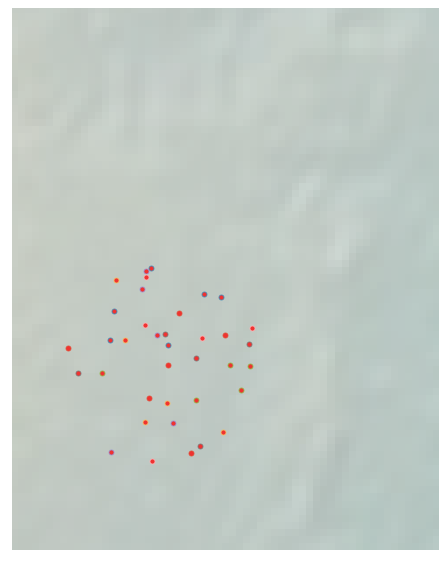

In [262]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

# initialize variables for upper and lower latitude/longitude limits
llon=-98
ulon=-96
llat=37
ulat=39

# only use coordinates from df_scan that are within the upper/lower limits
df_scan = df_scan[(df_scan['lng'] > llon) & (df_scan['lng'] < ulon) & (df_scan['lat'] > llat) &(df_scan['lat'] < ulat)]

# create Basemap
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()

# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data        
xs,ys = my_map(np.asarray(df_scan.lng), np.asarray(df_scan.lat))
df_scan['xm']= xs.tolist()
df_scan['ym'] =ys.tolist()

#Visualization
for index,row in df_scan.iterrows():
# x,y = my_map(row.lng, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)

plt.show()

With Basemap, the latitude/longitude coordinates get converted to pixel locations stored under the headings of 'xm' and 'ym'. They will then be projected onto a map-like background so that the points can be visualized. Next, they need to be broken up into clusters. To do this, I install DBSCAN from sklearn library, which runs its clustering from a vector array or distance matrix. I pass Clus_dataSet, as a Numpy array, to DBSCAN to find core samples of high density and then expand clusters from there.

In [263]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000)
Clus_dataSet = df_scan[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.65, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_scan["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

The cluster label for outliers is -1

In [264]:
set(labels)

{-1, 0, 1, 2, 3}

Now, to visualize the clusters using Basemap

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Cluster 0
Cluster 1
Cluster 2
Cluster 3


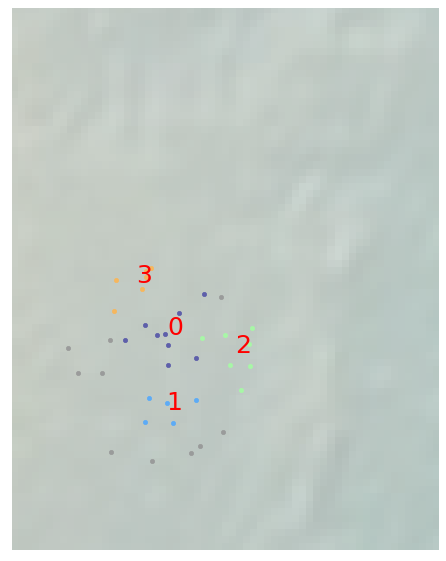

In [265]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

# create Basemap
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()

#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_scan[df_scan.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number))

Now, I will sort the DataFrame by Cluster number to make it easier to view how the clusters are segmented.

In [266]:
# sort df_scan by 'Clus_Db' labels in ascending order and reset index
df_scan.sort_values(by='Clus_Db', ascending=True, inplace=True)
df_scan.reset_index(col_fill=range(0,37), drop=True, inplace=True)

df_scan.head()

,name,Wichita (mi),lat,lng,breeder0,breeder1,breeder2,breeder3,breeder4,breeder5,breeder6,breeder7,breeder8,breeder9,breeder10,breeder11,breeder12,breeder13,breeder14,breeder15,breeder16,breeder17,breeder18,breeder19,breeder20,breeder21,vet1,vet2,vet3,vet4,vet5,vet6,vet7,vet8,vet9,vet10,boarder1,boarder2,boarder3,boarder4,boarder5,boarder6,boarder7,boarder8,boarder9,boarder10,store0,store1,store2,store3,store4,xm,ym,Clus_Db
0,Udall,24.3,37.387522,-97.114206,23.745822,21.415267,18.618513,20.365858,21.672763,12.172310,21.304737,21.304737,26.875217,26.093082,18.618513,13.826159,13.826159,13.826159,35.677602,12.172310,43.854897,43.854897,21.304737,21.304737,21.304737,38.103463,28.136059,21.981459,26.517810,23.056649,28.584708,9.181052,28.959536,26.005959,29.273007,14.226011,19.739156,24.004152,29.273007,26.020572,21.207598,24.633622,14.470864,21.158480,23.793016,17.492864,30.463190,20.561849,20.582123,31.414958,25.312078,98495.752472,54093.480755,-1
1,Potwin,24.3,37.938906,-97.019756,26.569101,23.502918,28.108012,21.420756,16.927734,26.211213,18.446987,18.446987,26.059480,29.480880,28.108012,28.135472,28.135472,28.135472,39.257234,26.211213,24.793130,24.793130,18.446987,18.446987,18.446987,44.454278,29.048710,22.493394,25.328275,24.161094,27.898162,33.566453,31.640834,18.048111,28.894353,30.074909,24.913625,23.970356,28.894353,18.798859,18.414985,17.400423,29.949989,18.162407,23.766227,30.625013,28.383498,20.787015,20.758131,27.551402,18.419575,108998.108348,131544.661155,-1
2,Bushnell,24.8,37.361689,-97.160041,23.937309,22.159949,18.821015,21.570203,23.679943,14.404841,23.953259,23.953259,27.065085,25.889993,18.821015,14.592154,14.592154,14.592154,34.692853,14.404841,44.425024,44.425024,23.953259,23.953259,23.953259,36.748292,27.986445,22.834376,26.797102,23.598054,28.562478,9.195516,28.535199,27.165582,29.147597,14.443149,20.398905,24.525241,29.147597,27.086756,22.888649,25.994104,14.687311,22.915623,24.350637,17.319969,30.402133,21.857839,21.880650,31.447938,26.474053,93399.135409,50478.838744,-1
3,Cicero,24.7,37.333910,-97.340600,23.079576,23.292695,18.766266,24.207836,28.630700,20.960884,31.072626,31.072626,25.871638,23.521458,18.766266,17.160130,17.160130,17.160130,29.139100,20.960884,43.500506,43.500506,31.072626,31.072626,31.072626,29.959831,25.595495,24.224852,25.920879,23.908851,26.540910,11.856709,25.191889,29.109010,26.738919,15.468929,21.510271,24.665230,26.738919,28.734623,26.868151,28.681578,15.639827,27.132039,24.627324,16.377787,28.108172,24.744970,24.773032,29.387761,28.482500,73321.900103,46593.293883,-1
4,Rock,25.1,37.440299,-97.006426,25.182119,21.774329,20.393085,19.699323,18.710342,9.626195,16.263612,16.263612,28.157012,28.236100,20.393085,14.971434,14.971434,14.971434,39.088759,9.626195,43.797418,43.797418,16.263612,16.263612,16.263612,42.183167,30.084212,22.046724,27.621643,23.767468,30.248439,12.709413,31.439516,25.084811,31.127940,16.455195,20.425407,24.703413,31.127940,25.329399,19.215611,23.277286,16.668030,18.957171,24.422365,20.115983,32.140719,19.646561,19.658684,32.860166,24.421348,110480.336023,61482.093558,-1


Now that I have seen the DBSCAN results, I will prepare the data to fit into a K-Means model. First, I will make a copy of df_scan to retrieve all of the distance data. I can drop all of the unnecessary columns containing text and irrelevant numeric entries. Then I convert the remaining set of numbers to an array.

In [267]:
# copy df_scan to a new DataFrame
df_k = df_scan.copy()

# drop columns with non-numeric or non-essential values
df_k.drop(df_k[['name','lat','lng','xm','ym','Clus_Db']],axis=1, inplace=True)

# convert remaining values to an array (feature matrix)
df_k_arr = np.array(df_k)

df_k_arr

array([[24.3, 23.745822, 21.415267, ..., 20.582123, 31.414958, 25.312078],
       [24.3, 26.569101, 23.502918, ..., 20.758131, 27.551402, 18.419575],
       [24.8, 23.937309, 22.159949, ..., 21.88065, 31.447938, 26.474053],
       ...,
       [23.6, 25.198081, 25.643599, ..., 26.163571, 20.274215, 21.386441],
       [23.3, 24.29957, 26.137682, ..., 27.832206, 17.602227, 23.131004],
       [22.1, 23.722244, 24.1818, ..., 24.755454, 18.870615, 19.969448]],
      dtype=object)

Now, I will use StandardScaler() to normalize the dataset. Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally.

In [268]:
from sklearn import preprocessing

# normalize data
df_k_arr = preprocessing.StandardScaler().fit(df_k_arr).transform(df_k_arr.astype(float))

df_k_arr[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.99625018,  0.80403635,  0.59166208, -0.03325073,  0.41715964,
         0.36118272, -0.96687464, -0.0788286 , -0.0788286 ,  1.17716996,
         0.86933713, -0.03325073, -0.69638426, -0.69638426, -0.69638426,
         0.86364674, -0.96687464,  1.58969526,  1.58969526, -0.0788286 ,
        -0.0788286 , -0.0788286 ,  0.69254566,  1.08229488,  0.70230689,
         1.18628027,  0.83019794,  1.1915786 , -1.28076461,  0.95519003,
         1.23865767,  1.17097689, -0.66564772,  0.26887683,  0.96992638,
         1.17097689,  1.25252025,  0.44634135,  1.04095065, -0.63495083,
         0.40951458,  0.94865868, -0.2887928 ,  1.26799625,  0.44157394,
         0.44476325,  1.35300535,  1.16740869],
       [ 0.99625018,  1.22711376,  0.91114944,  1.28335376,  0.57340814,
        -0.2153085 ,  0.52661936, -0.35131478, -0.35131478,  1.0626933 ,
         1.3287679 ,  1.28335376,  1.03634848,  1.03634848,  1.03634848,
         1.19899301,  0.52661936,  0.04630147,  0.04630147, -0.35131478,
   

Now the data is prepared to be used in the KMeans module. The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

In [269]:
# import k-means from clustering stage
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

This algorithm requires the number of clusters to be specified.

In [474]:
# initialize K-Means clustering
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

# fit the K-Means model with the feature matrix
k_means.fit(df_k_arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

The KMeans module produces labels, similar to the cluster numbers used in the DBSCAN module. These labels determine which cluster each entry belongs to. 

In [475]:
# retrieve labels for each point in the model and save to a variable
k_means_labels = k_means.labels_

k_means_labels

array([0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 3, 1, 3, 1, 1, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 3, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2], dtype=int32)

I will copy df_scan once again and create a new DataFrame that incorporates all of its information plus the KMeans labels. From this new dataset, I can see how the KMeans labels align with the DBSCAN clustering numbers. Additionally, I can sort the rows by their KMeans number to observe how the cities are clustered.

In [477]:
# copy df_scan to a new DataFrame
df_kms = df_scan.copy()

# add 'labels' column to store K-Means labels
df_kms['labels'] = k_means_labels

# sort df_kms by 'labels' in ascending order and reset index
df_kms.sort_values(by='labels', ascending=True, inplace=True)
df_kms.reset_index(col_fill=range(0,37), drop=True, inplace=True)

df_kms.head(3)

,name,Wichita (mi),lat,lng,breeder0,breeder1,breeder2,breeder3,breeder4,breeder5,breeder6,breeder7,breeder8,breeder9,breeder10,breeder11,breeder12,breeder13,breeder14,breeder15,breeder16,breeder17,breeder18,breeder19,breeder20,breeder21,vet1,vet2,vet3,vet4,vet5,vet6,vet7,vet8,vet9,vet10,boarder1,boarder2,boarder3,boarder4,boarder5,boarder6,boarder7,boarder8,boarder9,boarder10,store0,store1,store2,store3,store4,xm,ym,Clus_Db,labels
0,Udall,24.3,37.387522,-97.114206,23.745822,21.415267,18.618513,20.365858,21.672763,12.172310,21.304737,21.304737,26.875217,26.093082,18.618513,13.826159,13.826159,13.826159,35.677602,12.172310,43.854897,43.854897,21.304737,21.304737,21.304737,38.103463,28.136059,21.981459,26.517810,23.056649,28.584708,9.181052,28.959536,26.005959,29.273007,14.226011,19.739156,24.004152,29.273007,26.020572,21.207598,24.633622,14.470864,21.158480,23.793016,17.492864,30.463190,20.561849,20.582123,31.414958,25.312078,98495.752472,54093.480755,-1,0
1,Haverhill,24.9,37.685574,-96.883088,26.442036,21.832381,24.302003,18.380332,11.852769,14.154148,4.833496,4.833496,28.109459,30.282473,24.302003,20.658909,20.658909,20.658909,42.313185,14.154148,37.277771,37.277771,4.833496,4.833496,4.833496,46.852155,31.184008,21.265287,27.288815,23.805469,30.598620,23.716542,33.556346,20.435922,31.748731,23.231045,21.907504,24.351193,31.748731,21.196453,14.772890,18.237794,23.268505,14.120183,24.005462,25.933726,32.085979,17.741143,17.725296,32.057497,20.126337,124194.889427,95888.442695,2,0
2,Bois d' Arc,23.6,37.596408,-96.925312,24.614540,20.117167,21.367928,16.853472,11.944954,9.329706,5.910523,5.910523,26.869142,28.372084,21.367928,16.769854,16.769854,16.769854,40.373888,9.329706,38.908913,38.908913,5.910523,5.910523,5.910523,44.501382,29.659814,19.832454,26.113474,22.262247,29.327510,18.570578,31.756470,20.566682,30.425458,19.254380,19.648534,22.999775,30.425458,21.162912,14.142571,18.343675,19.350495,13.573093,22.654518,22.471899,31.028663,16.383082,16.377316,31.281984,20.074890,119499.797055,83367.425182,2,0


Now that I have all of the clustering data, I will create some functions to make it easier to organize and view the data, and perform operations on it as well. The main operation required in this case is the mean() function to calculate the average/mean distance of each cluster to whichever point is specified as an input. I will create a function that displays the mean distance for each cluster in both the DBSCAN and KMeans models (for comparison.) Additionally, I will create a function that will display all of the cities contained within any specified cluster from DBSCAN and/or KMeans.

In [478]:
# create funtion that takes any feature from the dataset as an input and, 
# using the clusters of cities created by both DBSCAN and K-Means, 
# prints the average distance of each cluster to that input.
def avg_prox(col_name):
    zero = df_kms[df_kms['labels']==0].index.tolist()
    one = df_kms[df_kms['labels']==1].index.tolist()
    two = df_kms[df_kms['labels']==2].index.tolist()
    three = df_kms[df_kms['labels']==3].index.tolist()
    print('\nDBSCAN:' '\nCluster-1:',np.mean(df_scan[col_name][0:10]).round(1),'mi','\nCluster0:',np.mean(df_scan[col_name][10:19]).round(1),'mi','\nCluster1:',np.mean(df_scan[col_name][19:24]).round(1),'mi','\nCluster2:',np.mean(df_scan[col_name][24:31]).round(1),'mi','\nCluster3:',np.mean(df_scan[col_name][31:37]).round(1),'mi')
    print('Kmeans:' '\nCluster0:',np.mean(df_kms[col_name][0:len(zero)]).round(1),'mi','\nCluster1:',np.mean(df_kms[col_name][len(zero):len(zero)+len(one)]).round(1),'mi','\nCluster2:',np.mean(df_kms[col_name][len(zero)+len(one):len(zero)+len(one)+len(two)]).round(1),'mi','\nCluster3:',np.mean(df_kms[col_name][len(zero)+len(one)+len(two):len(zero)+len(one)+len(two)+len(three)]).round(1),'mi')
    
# create a function that takes a cluster name as an input and displays all of 
# the cities and towns in that cluster
def show_clus(DB_clus_num=0,KM_clus_num=0):
    zero = df_kms[df_kms['labels']==0].index.tolist()
    one = df_kms[df_kms['labels']==1].index.tolist()
    two = df_kms[df_kms['labels']==2].index.tolist()
    three = df_kms[df_kms['labels']==3].index.tolist()
    if DB_clus_num==-1:
        print('DBSCAN Cluster-1:\n',df_scan['name'][0:10])
    if DB_clus_num==0:
        print('DBSCAN Cluster0:\n',df_scan['name'][10:19])
    if DB_clus_num==1:
        print('DBSCAN Cluster1:\n',df_scan['name'][19:24])
    if DB_clus_num==2:
        print('DBSCAN Cluster2:\n',df_scan['name'][24:31])
    if DB_clus_num==3:
        print('DBSCAN Cluster3:\n',df_scan['name'][31:37])
    if KM_clus_num==0:
        print('Kmeans Cluster0:\n',df_kms['name'][0:len(zero)])
    if KM_clus_num==1:
        print('Kmeans Cluster1:\n',df_kms['name'][len(zero):len(zero)+len(one)])
    if KM_clus_num==2:
        print('Kmeans Cluster2:\n',df_kms['name'][len(zero)+len(one):len(zero)+len(one)+len(two)])
    if KM_clus_num==3:
        print('Kmeans Cluster3:\n',df_kms['name'][len(zero)+len(one)+len(two):len(zero)+len(one)+len(two)+len(three)])
    print('0:',len(zero))

Since the client expressed interest in being in close promity to a top-rated Veterinary clinic, and Pet Boarding Facility, I will start with the number one rated venues in each of these categories and compare the results.

In [479]:
# apply avg_prox() function on top-rated Veterinary Clinic and Pet Boarding Facility
avg_prox('vet1')
avg_prox('boarder1')


DBSCAN:
Cluster-1: 20.7 mi 
Cluster0: 13.6 mi 
Cluster1: 15.8 mi 
Cluster2: 28.1 mi 
Cluster3: 20.9 mi
Kmeans:
Cluster0: 28.7 mi 
Cluster1: 10.5 mi 
Cluster2: 20.5 mi 
Cluster3: 14.6 mi

DBSCAN:
Cluster-1: 21.2 mi 
Cluster0: 12.4 mi 
Cluster1: 9.5 mi 
Cluster2: 19.9 mi 
Cluster3: 25.7 mi
Kmeans:
Cluster0: 21.3 mi 
Cluster1: 16.6 mi 
Cluster2: 25.5 mi 
Cluster3: 9.5 mi


The clusters with the closest average distance to 'vet1' are Cluster0 (DBSCAN) and Cluster1 (KMeans). The ones with the closest average distance to 'boarder1' are Cluster1 (DBSCAN) and Cluster3 (KMeans). I will call the show_clus() function to see which cities belong to these clusters.

In [480]:
# Choose the clusters with the lowest average distance from each list and 
# apply show_clus() function to view cities contained in those clusters
show_clus(0,1)
show_clus(1,3)

DBSCAN Cluster0:
 10      Eastborough
11    Valley Center
12          Andover
13           Furley
14            Maize
15         Brainerd
16         Bel Aire
17        Park City
18            Kechi
Name: name, dtype: object
Kmeans Cluster1:
 12          Bentley
13          Colwich
14          Goddard
15    Valley Center
16           Furley
17            Maize
Name: name, dtype: object
0: 12
DBSCAN Cluster1:
 19        Derby
20    Haysville
21    Rose Hill
22         Peck
23      Mulvane
Name: name, dtype: object
Kmeans Cluster3:
 26           Peck
27        Mulvane
28      Haysville
29          Derby
30         Benton
31      Park City
32       Bel Aire
33        Andover
34    Eastborough
35      Rose Hill
36          Kechi
Name: name, dtype: object
0: 12


As can be seen, there are not a lot of similarities between the clusters, i.e. they do not have very many cities in common. This is because the two points are too far away from each other, making it difficult to find optimum locations that satisfy the request. Map_wichita7 verifies that these two locations (vet1 and boarder1) are a good distance apart. So, I will try running two more locations, which are the number two rated vet clinic and the number two rated boarding facility.

In [481]:
# run the function again, but with different targets
avg_prox('vet2')
avg_prox('boarder2')


DBSCAN:
Cluster-1: 22.1 mi 
Cluster0: 10.1 mi 
Cluster1: 11.8 mi 
Cluster2: 18.8 mi 
Cluster3: 23.3 mi
Kmeans:
Cluster0: 21.2 mi 
Cluster1: 15.2 mi 
Cluster2: 24.3 mi 
Cluster3: 9.2 mi

DBSCAN:
Cluster-1: 21.6 mi 
Cluster0: 10.2 mi 
Cluster1: 12.8 mi 
Cluster2: 21.5 mi 
Cluster3: 21.7 mi
Kmeans:
Cluster0: 23.4 mi 
Cluster1: 13.0 mi 
Cluster2: 22.6 mi 
Cluster3: 10.3 mi


In both cases (the vet and boarding locations), the optimum city clusters are Cluster0 for DBSCAN and Cluster3 for KMeans. I will call the show_clus() function again to display the cities belonging to these clusters.

In [482]:
# display the best clusters
show_clus(0,3)

DBSCAN Cluster0:
 10      Eastborough
11    Valley Center
12          Andover
13           Furley
14            Maize
15         Brainerd
16         Bel Aire
17        Park City
18            Kechi
Name: name, dtype: object
Kmeans Cluster3:
 26           Peck
27        Mulvane
28      Haysville
29          Derby
30         Benton
31      Park City
32       Bel Aire
33        Andover
34    Eastborough
35      Rose Hill
36          Kechi
Name: name, dtype: object
0: 12


There seem to be a bit more commonalities among these results. If I can trust the algorithms of these two unsupervised machine-learning models, the cities in these clusters represent optimal positions relative to all points of interest on the map, with special emphasis on being in close proximity to the number two rated vet and number two rated boarding facility. Since locations like this could be ideal for the client, these might be good choices for her to start looking at real estate. I would suggest that she starts with the cities which appear in both lists, such as Valley Center, Furley, and Maize.

The avg_prox() and show_clus() functions are very convenient for viewing the data numerically and textually. Now I will give one more type of visualization in the form of a bar graph. I will just show the DBSCAN clusters for now.

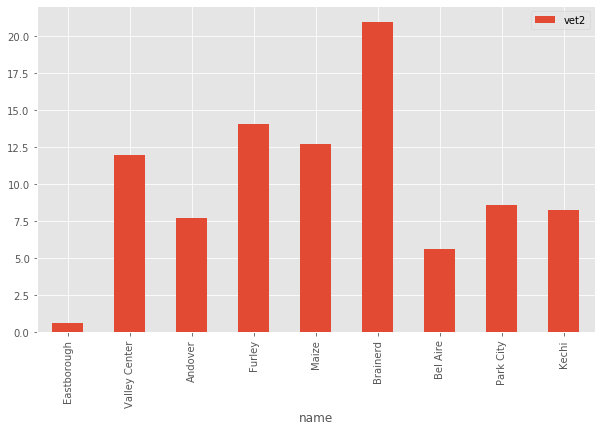

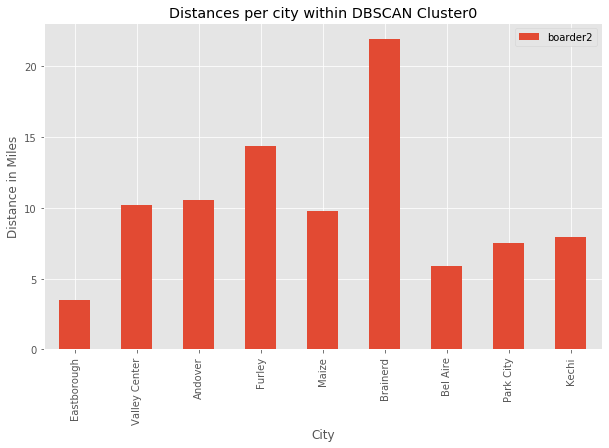

In [483]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

df_clus = df_scan[['vet2','name']][10:19] 
df_clus.set_index('name', inplace=True)

df_clus2 = df_scan[['boarder2','name']][10:19] 
df_clus2.set_index('name', inplace=True)

# plot data
df_clus.plot(kind='bar', figsize=(10, 6))
df_clus2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('City') # add x-label to the plot
plt.ylabel('Distance in Miles') # add y-label to the plot
plt.title('Distances per city within DBSCAN Cluster0') # add title to the plot

plt.show()

As can be seen, Valley Center, Furley, and Maize are not necessarily the closest cities to the client's points of interest, but the algorithms are also taking into consideration other factors that the client has expressed, such as not wanting to be too close to the city limits, and being near areas where other breeders are established (more acreage available). As suggested, she should start with the cities that best fit her needs in an overall way and work from there.

Now that I have these functions in place, I can call them again with any other point of interest that the client  specifies and then give her the updated result until a decision can be finalized. The tools and data are all there to help her make an informed decision.

### This completes this case study. Thank you for reading it!